# `pandas datetime remaining topics`

In [1]:
import numpy as np
import pandas as pd

#### `timedelta`

    The timedelta object is used to return the difference between two pandas timestamp objects.

In [2]:
t1 = pd.Timestamp('26 March 2024 20:04')
t1

Timestamp('2024-03-26 20:04:00')

In [3]:
t2 = pd.Timestamp('30 April 2024 20:04')
t2

Timestamp('2024-04-30 20:04:00')

In [4]:
t2 - t1

Timedelta('35 days 00:00:00')

In [5]:
type(t2 - t1)

pandas._libs.tslibs.timedeltas.Timedelta

In [6]:
(t2 - t1).__class__.__name__

'Timedelta'

##### `We can also create a timedelta object manually by using the pd.Timedelta() constructor.`

    Available kwargs: {days, seconds, microseconds,
    milliseconds, minutes, hours, weeks}

In [7]:
pd.Timedelta(days = 2)

Timedelta('2 days 00:00:00')

In [8]:
delta = pd.Timedelta(weeks = 2, days = 2, hours = 5, minutes = 78, seconds = 12)
delta

Timedelta('16 days 06:18:12')

##### `We can also create a timedelta index object. It is a collection of timedelta objects.`

In [9]:
pd.TimedeltaIndex(['2 days', '3 days 6 hours 30 minutes 40 seconds 90 microseconds'])

TimedeltaIndex(['2 days 00:00:00', '3 days 06:30:40.000090'], dtype='timedelta64[ns]', freq=None)

## `Applying methods on DatetimeIndex object`

    When we create a pandas DatetimeIndex object using Timestamp objects, we can either use this as a column in our 
    dataframe or we may chose to use it as index object of our series or dataframe.

In [10]:
index = pd.DatetimeIndex(['2 March 2022', '4 July 1899', '21 June 2022', '21 Sep 2023'])
index

DatetimeIndex(['2022-03-02', '1899-07-04', '2022-06-21', '2023-09-21'], dtype='datetime64[ns]', freq=None)

### `Note`
`When we want to use date time methods on index object, then we do not need to use the dt accessor. When only need to use it, when we are dealing with a datetime column of a dataframe.`

In [11]:
index.month_name()
index.day_name()

Index(['Wednesday', 'Tuesday', 'Tuesday', 'Thursday'], dtype='object')

In [12]:
index.quarter
index.day
index.year
index.month
index.minute
index.hour
index.second

Index([0, 0, 0, 0], dtype='int32')

# `Time series data`

    A time series data is a data which is taken over a period of time. As a data scientist, these types of data are very 
    important.
    
    Although we are not going to study time series data, we are going to study their analysis and that too only relative
    to our context.
    
    We can either do time series data analysis or we may do forecasting on time series data.
    
    Time series is a very broad topic. We are not going to study the analysis or forecasting of time series. We are just
    learning to do a bit of analysis on time series data.

In [13]:
google = pd.read_csv('google.csv')
google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600


`The first step while doing any time series analysis is to make the date column into a pandas datetime column and then make this a index of the dataframe.`

In [14]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


#### `As we can see that right now the Date column has data type as Object. Thus we need to change this.`

In [15]:
google['Date'] = pd.to_datetime(google['Date'])
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


#### `Now we need to set this Date column as the index of our dataframe.`

In [16]:
google = google.set_index('Date')
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


#### `Fetch the data of 24 August 2004`

In [17]:
google.loc['24 August 2004']
# google.loc[2004-08-24]

Open         5.541230e+01
High         5.559163e+01
Low          5.159162e+01
Close        5.223920e+01
Adj Close    5.223920e+01
Volume       1.531981e+07
Name: 2004-08-24 00:00:00, dtype: float64

#### `Fetch the data of the August 2004`

In [18]:
google.loc['August 2004']
# google.loc['2004-08']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221498
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252


#### `Fetch the data of year 2006`

In [19]:
google.loc['2006']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,210.471100,217.021545,208.329132,216.802368,216.802368,26340763
2006-01-04,221.121185,223.641739,219.053925,221.788681,221.788681,30687394
2006-01-05,222.167267,224.931900,219.925659,224.777481,224.777481,21697624
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914
2006-01-09,232.334152,235.816101,229.609375,232.578247,232.578247,25679694
...,...,...,...,...,...,...
2006-12-22,227.895798,228.463669,225.519699,226.939377,226.939377,8006498
2006-12-26,227.407623,228.877106,226.446228,227.910736,227.910736,4164150
2006-12-27,229.141129,233.166031,228.692810,233.141129,233.141129,8494721


#### `create new columns month_name and day_name from the index of google stocks.`

In [20]:
google.loc[::, 'month_name'] = google.index.month_name()
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name
Date,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August


In [21]:
google.loc[::, 'day_name'] = google.index.day_name()
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name
Date,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday


#### `create a new column named quarter which stores the quarter of the year the current data lies in.`

In [22]:
google.loc[::, 'quarter'] = google.index.quarter
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3


#### `Find all the rows from 17 December 2007 to 21 Jan 2008`

In [23]:
google.loc['17 December 2007': '21 Jan 2008']

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2007-12-17,342.715424,346.411560,330.595856,333.365479,333.365479,11013126,December,Monday,4
2007-12-18,335.821259,337.091492,325.031708,335.417786,335.417786,14387125,December,Tuesday,4
2007-12-19,335.846161,338.481293,333.250885,337.420258,337.420258,8875343,December,Wednesday,4
2007-12-20,341.634460,344.209808,339.034210,343.557251,343.557251,8877551,December,Thursday,4
2007-12-21,347.636963,348.324402,345.325623,347.044189,347.044189,10804346,December,Friday,4
2007-12-24,346.197357,349.056641,345.235962,349.056641,349.056641,3269007,December,Monday,4
2007-12-26,348.189911,355.278320,347.801361,354.092773,354.092773,5078966,December,Wednesday,4
2007-12-27,352.214813,356.663147,349.061646,349.061646,349.061646,5907058,December,Thursday,4
2007-12-28,351.148804,352.653168,346.969482,349.953278,349.953278,5144611,December,Friday,4


## `plotting graphs`

<Axes: xlabel='Date'>

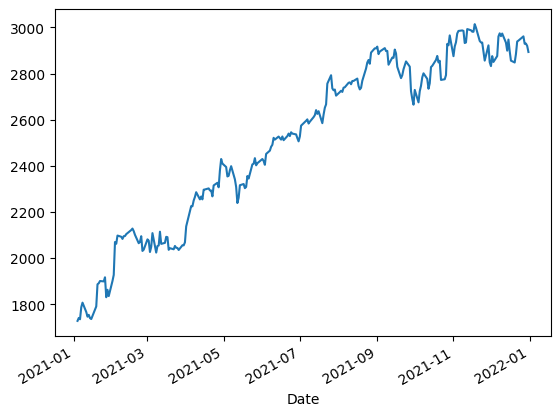

In [24]:
google.loc['2021']['Close'].plot()

#### `Plot the trend of opening stock prices of google stocks in 2010.`

<Axes: xlabel='Date'>

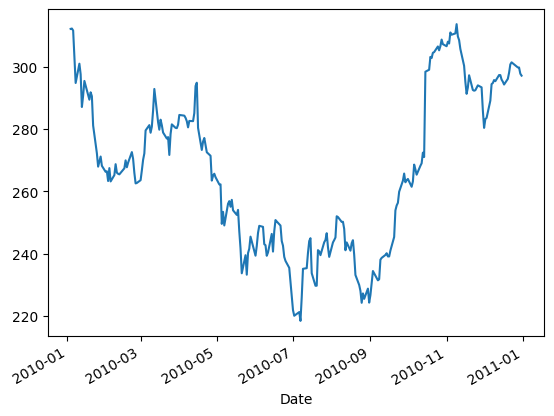

In [25]:
google.loc['2010']['Open'].plot()

<Axes: xlabel='day_name'>

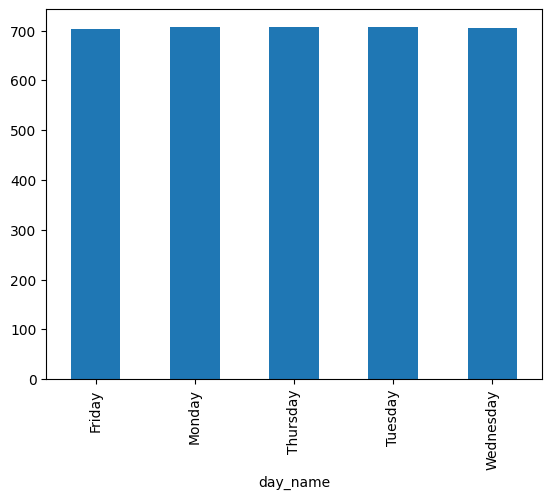

In [26]:
google.groupby('day_name')['Open'].mean().plot(kind = 'bar')

# `Moving Averages(Smoothning)`

    The concept of moving averages is used to smoothen the time series data. In this method we create a rolling
    window of size m, and then perform some aggregate operation of this rolling window.

In [27]:
ser = pd.Series([20* i + 3 for i in range(10)], index = range(10))
ser

0      3
1     23
2     43
3     63
4     83
5    103
6    123
7    143
8    163
9    183
dtype: int64

In [28]:
ser.rolling(3).sum()

0      NaN
1      NaN
2     69.0
3    129.0
4    189.0
5    249.0
6    309.0
7    369.0
8    429.0
9    489.0
dtype: float64

In [29]:
ser.rolling(4).mean()

0      NaN
1      NaN
2      NaN
3     33.0
4     53.0
5     73.0
6     93.0
7    113.0
8    133.0
9    153.0
dtype: float64

<Axes: xlabel='Date'>

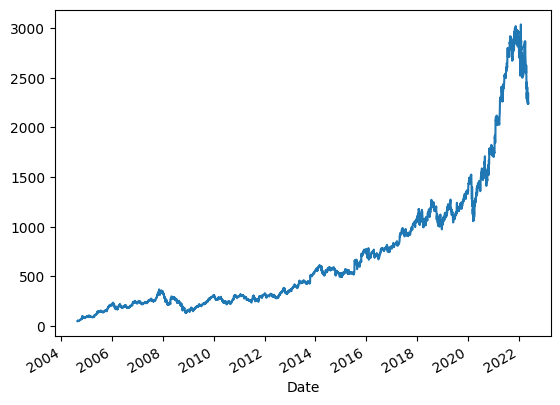

In [30]:
google['Open'].plot()

<Axes: xlabel='Date'>

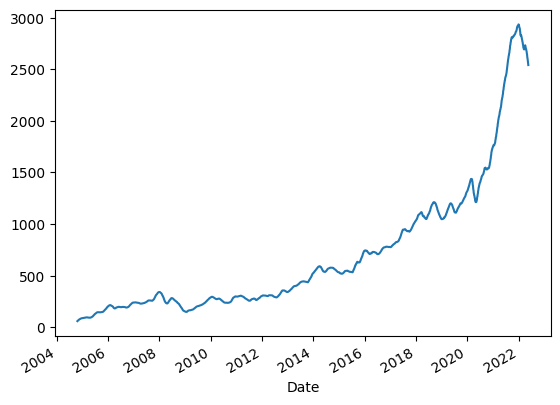

In [31]:
# After smoothning
google['Open'].rolling(45).mean().plot()

<Axes: xlabel='Date'>

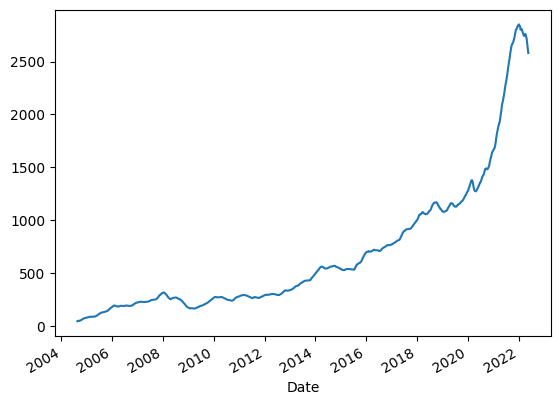

In [32]:
# exponentially weighted average(ewm)
google['Open'].ewm(45).mean().plot()

# `Shifting`

    The concept of shifting is used to shift the values of a series or a dataframe by a specified number of units.
    
    For example, s.shift(1) will shift the series by 1.
    
    shift(-2) will shift the series upwards by 2.

In [33]:
ser = pd.Series([20* i + 3 for i in range(10)], index = range(10))
ser

0      3
1     23
2     43
3     63
4     83
5    103
6    123
7    143
8    163
9    183
dtype: int64

In [34]:
ser.shift(1) # shifted whole series downward by 1

0      NaN
1      3.0
2     23.0
3     43.0
4     63.0
5     83.0
6    103.0
7    123.0
8    143.0
9    163.0
dtype: float64

In [35]:
ser.shift(-2) # shifted whole series upward by 2

0     43.0
1     63.0
2     83.0
3    103.0
4    123.0
5    143.0
6    163.0
7    183.0
8      NaN
9      NaN
dtype: float64

### `Example of shift`

In [36]:
pd.read_csv('login.csv')

,1,466,2017-01-07 18:24:07,Unnamed: 3
0,2,466,2017-01-07 18:24:55,NaN
1,3,458,2017-01-07 18:25:18,NaN
2,4,458,2017-01-07 18:26:21,NaN
3,5,592,2017-01-07 19:09:59,NaN
4,6,393,2017-01-08 00:41:19,NaN
...,...,...,...,...
2997,2999,1307,2018-01-04 10:48:28,183.82.121.201
2998,3000,1230,2018-01-04 11:22:00,47.247.147.114
2999,3001,1307,2018-01-04 13:13:44,183.82.121.201
3000,3002,1307,2018-01-04 13:13:45,183.82.121.201


In [37]:
pd.read_csv('login.csv', header = None)

,0,1,2,3
0,1,466,2017-01-07 18:24:07,Unnamed: 3
1,2,466,2017-01-07 18:24:55,NaN
2,3,458,2017-01-07 18:25:18,NaN
3,4,458,2017-01-07 18:26:21,NaN
4,5,592,2017-01-07 19:09:59,NaN
...,...,...,...,...
2998,2999,1307,2018-01-04 10:48:28,183.82.121.201
2999,3000,1230,2018-01-04 11:22:00,47.247.147.114
3000,3001,1307,2018-01-04 13:13:44,183.82.121.201
3001,3002,1307,2018-01-04 13:13:45,183.82.121.201


In [38]:
login = pd.read_csv('login.csv', header = None)[[1,2]]
login.rename(columns = {1: 'user_id', 2: 'login_time'}, inplace = True)
login.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


### `Find the average returning time of most frequent visitor.`

In [39]:
_id = login['user_id'].value_counts().head(1).index[0]
_id

413

`The user_id 413 has visited the website most number of times. We now need to find the average returning time of this user.`

In [40]:
mask = login['user_id'] == _id
user_df = login[mask]

user_df

,user_id,login_time
11,413,2017-01-09 12:29:25
12,413,2017-01-09 12:40:39
14,413,2017-01-09 14:08:04
33,413,2017-01-10 14:36:23
35,413,2017-01-10 15:22:45
...,...,...
2958,413,2017-12-29 18:20:32
2963,413,2017-12-30 13:41:21
2974,413,2018-01-01 15:16:25
2982,413,2018-01-02 18:15:45


In [41]:
# change the data type of login_time column to datetime64[ns]
user_df['login_time'] = pd.to_datetime(user_df['login_time'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 11 to 2997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     222 non-null    int64         
 1   login_time  222 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


C:\Users\HU496FA\AppData\Local\Temp\ipykernel_29060\1093887548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [42]:
user_df['login_time'].shift(1)

11                     NaT
12     2017-01-09 12:29:25
14     2017-01-09 12:40:39
33     2017-01-09 14:08:04
35     2017-01-10 14:36:23
               ...        
2958   2017-12-29 18:19:48
2963   2017-12-29 18:20:32
2974   2017-12-30 13:41:21
2982   2018-01-01 15:16:25
2997   2018-01-02 18:15:45
Name: login_time, Length: 222, dtype: datetime64[ns]

In [43]:
user_df['shifted_login_time'] = user_df['login_time'].shift(1)
user_df

C:\Users\HU496FA\AppData\Local\Temp\ipykernel_29060\2186726288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted_login_time'] = user_df['login_time'].shift(1)


,user_id,login_time,shifted_login_time
11,413,2017-01-09 12:29:25,NaT
12,413,2017-01-09 12:40:39,2017-01-09 12:29:25
14,413,2017-01-09 14:08:04,2017-01-09 12:40:39
33,413,2017-01-10 14:36:23,2017-01-09 14:08:04
35,413,2017-01-10 15:22:45,2017-01-10 14:36:23
...,...,...,...
2958,413,2017-12-29 18:20:32,2017-12-29 18:19:48
2963,413,2017-12-30 13:41:21,2017-12-29 18:20:32
2974,413,2018-01-01 15:16:25,2017-12-30 13:41:21
2982,413,2018-01-02 18:15:45,2018-01-01 15:16:25


In [44]:
user_df['login_time'] - user_df['shifted_login_time']

11                 NaT
12     0 days 00:11:14
14     0 days 01:27:25
33     1 days 00:28:19
35     0 days 00:46:22
             ...      
2958   0 days 00:00:44
2963   0 days 19:20:49
2974   2 days 01:35:04
2982   1 days 02:59:20
2997   1 days 16:27:58
Length: 222, dtype: timedelta64[ns]

In [45]:
(user_df['login_time'] - user_df['shifted_login_time']).mean()

Timedelta('1 days 15:05:13.384615384')

#### `Thus, the most frequent visitor visits the website on an average after every 1 day 15 hours 5 minutes.`